In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh.feature_extraction import EfficientFCParameters

In [2]:
df=pd.read_csv(r'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\train_FD002.txt', delim_whitespace=True, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [4]:
col_1=['unit','time','op1','op2','op3']
col_2=[]
for i in range(21):
    col=f'sr{i+1}'
    col_2.append(col)
columns=col_1+col_2
df.columns=columns
df['max_time']=df.groupby('unit')['time'].transform('max')
df['remaining_time']=df['max_time']-df['time']
df['label']=df['remaining_time'].clip(upper=130)
df.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,9.3461,0.02,334,2223,100.00,14.73,8.8071,149,148,130
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,9.3774,0.02,330,2212,100.00,10.41,6.2665,149,147,130
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,10.8941,0.02,309,1915,84.93,14.08,8.6723,149,146,130
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,9.3528,0.02,329,2212,100.00,10.59,6.4701,149,145,130
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,10.8963,0.02,309,1915,84.93,14.13,8.5286,149,144,130


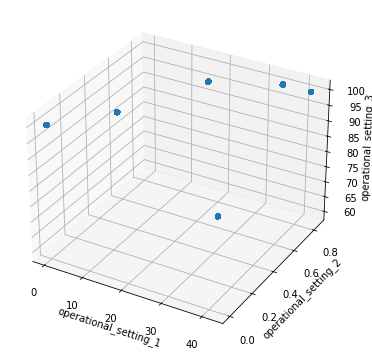

In [9]:

from mpl_toolkits.mplot3d import Axes3D
op1=df.iloc[:,2]
op2=df.iloc[:,3]
op3=df.iloc[:,4]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(op1, op2, op3)
ax.set_xlabel('operational_setting_1')
ax.set_ylabel('operational_setting_2')
ax.set_zlabel('operational_setting_3')
ax.tick_params(axis='x', pad=8)
ax.tick_params(axis='y', pad=8)
ax.tick_params(axis='z', pad=8)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'op3')

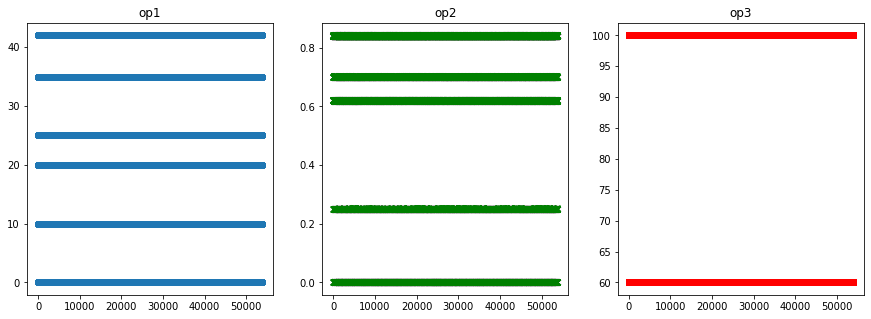

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(df.index, df['op1'], marker='o', label='op1')
axs[0].set_title('op1')
axs[1].scatter(df.index, df['op2'], marker='x', label='op2', color='g')
axs[1].set_title('op2')
axs[2].scatter(df.index, df['op3'], marker='s', label='op3', color='r')
axs[2].set_title('op3')

In [5]:
# type1: op1 in [0,1], op2 in [0,1], op3 in [99,100]
# type2: op1 in [9,11], op2 in [0.2,0.3], op3 in [99, 100]
# type3: op1 in [19,21], op2 in [0.65, 0.75], op3 in [99, 100]
# type4: op1 in [24, 26], op2 in [0.6, 0.63], op3 in [59, 61]
# type5: op1 in [30, 40], op2 >=0.8, op3 in [99, 100]
# type6: op1 >=40, op2>=0.8, op3 in [99, 100]
df_ops=df[['op1','op2','op3']]
conditions = [
    (df['op1'].between(0, 1)) & (df['op2'].between(0, 1)) & (df['op3'].between(99, 100)),  # type1
    (df['op1'].between(9, 11)) & (df['op2'].between(0.2, 0.3)) & (df['op3'].between(99, 100)),  # type2
    (df['op1'].between(19, 21)) & (df['op2'].between(0.65, 0.75)) & (df['op3'].between(99, 100)),  # type3
    (df['op1'].between(24, 26)) & (df['op2'].between(0.6, 0.63)) & (df['op3'].between(59, 61)),  # type4
    (df['op1'].between(30, 40)) & (df['op2'] >= 0.8) & (df['op3'].between(99, 100)),  # type5
    (df['op1'] >= 40) & (df['op2'] >= 0.8) & (df['op3'].between(99, 100))  # type6
]
type_labels = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']
df_ops['type'] = np.select(conditions, type_labels, default='undefined')
df_ops

C:\Users\owner\AppData\Local\Temp\ipykernel_52676\294332328.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['type'] = np.select(conditions, type_labels, default='undefined')


,op1,op2,op3,type
0,34.9983,0.8400,100.0,type5
1,41.9982,0.8408,100.0,type6
2,24.9988,0.6218,60.0,type4
3,42.0077,0.8416,100.0,type6
4,25.0005,0.6203,60.0,type4
...,...,...,...,...
53754,20.0037,0.7000,100.0,type3
53755,10.0022,0.2510,100.0,type2
53756,25.0041,0.6200,60.0,type4
53757,25.0033,0.6220,60.0,type4


In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
X_ops=ohe.fit_transform(df_ops[['type']])
X_ops 

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [7]:
column_names = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']
df_ops = pd.DataFrame(X_ops, columns=column_names)
df_ops

,type1,type2,type3,type4,type5,type6
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
53754,0.0,0.0,1.0,0.0,0.0,0.0
53755,0.0,1.0,0.0,0.0,0.0,0.0
53756,0.0,0.0,0.0,1.0,0.0,0.0
53757,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
# Prevent multicollinearity
df_ops=df_ops.iloc[:,1:]
df_ops

,type2,type3,type4,type5,type6
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
53754,0.0,1.0,0.0,0.0,0.0
53755,1.0,0.0,0.0,0.0,0.0
53756,0.0,0.0,1.0,0.0,0.0
53757,0.0,0.0,1.0,0.0,0.0


In [10]:
df=pd.concat([df, df_ops], axis=1)
df

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr20,sr21,max_time,remaining_time,label,type2,type3,type4,type5,type6
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,14.73,8.8071,149,148,130,0.0,0.0,0.0,1.0,0.0
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,10.41,6.2665,149,147,130,0.0,0.0,0.0,0.0,1.0
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,14.08,8.6723,149,146,130,0.0,0.0,1.0,0.0,0.0
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,10.59,6.4701,149,145,130,0.0,0.0,0.0,0.0,1.0
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,14.13,8.5286,149,144,130,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,24.36,14.5189,316,4,4,0.0,1.0,0.0,0.0,0.0
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,28.10,16.9454,316,3,3,1.0,0.0,0.0,0.0,0.0
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,14.19,8.5503,316,2,2,0.0,0.0,1.0,0.0,0.0
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,14.05,8.3729,316,1,1,0.0,0.0,1.0,0.0,0.0


In [5]:
window_size = 30

rolled_df = roll_time_series(
    df,
    column_id='unit',
    column_sort='time',
    max_timeshift=window_size-1,
    min_timeshift=window_size-1,
    rolling_direction=1
)

rolled_df

Rolling: 100%|██████████| 54/54 [00:09<00:00,  5.54it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label,id
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,0.02,334,2223,100.00,14.73,8.8071,149,148,130,"(1, 1)"
260,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,0.02,334,2223,100.00,14.73,8.8071,149,148,130,"(1, 2)"
261,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,0.02,330,2212,100.00,10.41,6.2665,149,147,130,"(1, 2)"
780,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,0.02,334,2223,100.00,14.73,8.8071,149,148,130,"(1, 3)"
781,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,0.02,330,2212,100.00,10.41,6.2665,149,147,130,"(1, 3)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493035,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,0.03,369,2324,100.00,24.36,14.5189,316,4,4,"(260, 316)"
1493036,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,0.03,374,2319,100.00,28.10,16.9454,316,3,3,"(260, 316)"
1493037,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,0.02,310,1915,84.93,14.19,8.5503,316,2,2,"(260, 316)"
1493038,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,0.02,311,1915,84.93,14.05,8.3729,316,1,1,"(260, 316)"


In [6]:
selected_cols=['id',
               'sr1', 'sr2', 'sr3', 'sr4', 'sr5',
               'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
                'sr11', 'sr12', 'sr13', 'sr14', 'sr15',
                'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']

In [7]:
selected_df=rolled_df[selected_cols]
selected_df

,id,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,"(1, 1)",449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
260,"(1, 2)",449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
261,"(1, 2)",445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
780,"(1, 3)",449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
781,"(1, 3)",445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493035,"(260, 316)",491.19,608.79,1495.60,1269.51,9.35,13.66,334.00,2324.92,8852.27,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
1493036,"(260, 316)",489.05,605.81,1514.32,1324.12,10.52,15.50,392.46,2319.17,8915.86,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
1493037,"(260, 316)",462.54,537.48,1276.24,1057.92,7.05,9.04,175.11,1917.37,8114.33,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
1493038,"(260, 316)",462.54,537.84,1272.95,1066.30,7.05,9.04,174.81,1917.36,8112.63,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [8]:
unique_ids = selected_df['id'].unique()

# Split the unique ids into two halves
midpoint = len(unique_ids) // 2
first_half_ids = unique_ids[:midpoint]  # First half of unique ids
second_half_ids = unique_ids[midpoint:]  # Second half of unique ids

# Filter the DataFrame for each half based on the unique ids
first_half_df = selected_df[selected_df['id'].isin(first_half_ids)]
second_half_df = selected_df[selected_df['id'].isin(second_half_ids)]

print(len(first_half_df)+ len(second_half_df))

1499670


In [9]:
first_half_df

,id,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,"(1, 1)",449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.0,14.73,8.8071
260,"(1, 2)",449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.0,14.73,8.8071
261,"(1, 2)",445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.0,10.41,6.2665
780,"(1, 3)",449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.0,14.73,8.8071
781,"(1, 3)",445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.0,10.41,6.2665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,"(131, 21)",489.05,604.36,1500.81,1307.17,10.52,15.49,395.26,2318.86,8766.38,...,372.49,2388.09,8130.45,8.6360,0.03,368,2319,100.0,28.56,17.2460
57347,"(131, 21)",518.67,641.90,1586.98,1395.63,14.62,21.60,554.56,2388.06,9057.60,...,522.49,2388.10,8128.31,8.4077,0.03,391,2388,100.0,39.15,23.4733
57348,"(131, 21)",489.05,604.66,1496.63,1306.04,10.52,15.49,394.76,2318.81,8775.57,...,371.86,2388.06,8129.43,8.6266,0.03,369,2319,100.0,28.75,17.1890
57349,"(131, 21)",445.00,549.51,1351.03,1119.09,3.91,5.72,139.13,2211.84,8317.26,...,130.90,2387.96,8082.78,9.3245,0.02,330,2212,100.0,10.58,6.4391


In [10]:
second_half_df

,id,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
62920,"(131, 22)",445.00,548.77,1355.19,1124.01,3.91,5.71,138.37,2211.86,8322.08,...,131.11,2387.97,8083.07,9.3369,0.02,328,2212,100.00,10.50,6.3679
62921,"(131, 22)",445.00,549.12,1356.03,1118.15,3.91,5.71,138.39,2211.78,8321.62,...,130.82,2387.90,8074.19,9.3423,0.02,329,2212,100.00,10.59,6.4255
62922,"(131, 22)",518.67,642.63,1585.02,1395.48,14.62,21.61,553.79,2388.11,9044.62,...,521.88,2388.02,8135.08,8.4228,0.03,393,2388,100.00,39.01,23.4155
62923,"(131, 22)",518.67,641.90,1580.80,1399.71,14.62,21.61,554.79,2388.04,9044.55,...,522.58,2388.03,8132.31,8.4028,0.03,395,2388,100.00,39.01,23.3156
62924,"(131, 22)",491.19,607.07,1479.34,1242.09,9.35,13.65,334.80,2323.90,8718.26,...,315.64,2388.03,8055.53,9.2115,0.02,364,2324,100.00,24.36,14.9172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493035,"(260, 316)",491.19,608.79,1495.60,1269.51,9.35,13.66,334.00,2324.92,8852.27,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
1493036,"(260, 316)",489.05,605.81,1514.32,1324.12,10.52,15.50,392.46,2319.17,8915.86,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
1493037,"(260, 316)",462.54,537.48,1276.24,1057.92,7.05,9.04,175.11,1917.37,8114.33,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
1493038,"(260, 316)",462.54,537.84,1272.95,1066.30,7.05,9.04,174.81,1917.36,8112.63,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [ ]:
extraction_settings = EfficientFCParameters()
X1=extract_features(
    first_half_df,
    column_id='id',
    impute_function=impute,
    default_fc_parameters=extraction_settings
)
X1

Feature Extraction:  40%|████      | 24/60 [11:39<04:37,  7.72s/it]  

In [20]:
extraction_settings = EfficientFCParameters()
X2=extract_features(
    second_half_df,
    column_id='id',
    impute_function=impute,
    default_fc_parameters=extraction_settings
)
X2

Feature Extraction: 100%|██████████| 60/60 [29:05<00:00, 29.10s/it]  


type2__variance_larger_than_standard_deviation  \
131 51                                              0.0   
    52                                              0.0   
    53                                              0.0   
    54                                              0.0   
    55                                              0.0   
...                                                 ...   
260 312                                             0.0   
    313                                             0.0   
    314                                             0.0   
    315                                             0.0   
    316                                             0.0   

         type2__has_duplicate_max  type2__has_duplicate_min  \
131 51                        1.0                       1.0   
    52                        1.0                       1.0   
    53                        1.0                       1.0   
    54                        1.0                       1.0   
    55                        1.0                       1.0   
...                           ...                       ...   
260 312                       1.0                       1.0   
    313                       1.0                       1.0   
    314                       1.0                       1.0   
    315                       1.0                       1.0   
    316                       1.0                       1.0   

         type2__has_duplicate  type2__sum_values  type2__abs_energy  \
131 51                    1.0                5.0                5.0   
    52                    1.0                5.0                5.0   
    53                    1.0                4.0                4.0   
    54                    1.0                4.0                4.0   
    55                    1.0                4.0                4.0   
...                       ...                ...                ...   
260 312                   1.0                3.0                3.0   
    313                   1.0                4.0                4.0   
    314                   1.0                4.0                4.0   
    315                   1.0                4.0                4.0   
    316                   1.0                4.0                4.0   

         type2__mean_abs_change  type2__mean_change  \
131 51                 0.310345            0.034483   
    52                 0.310345           -0.034483   
    53                 0.275862            0.000000   
    54                 0.275862            0.000000   
    55                 0.275862            0.000000   
...                         ...                 ...   
260 312                0.206897            0.000000   
    313                0.241379            0.034483   
    314                0.275862            0.000000   
    315                0.275862            0.000000   
    316                0.275862            0.000000   

         type2__mean_second_derivative_central  type2__median  ...  \
131 51                                0.000000            0.0  ...   
    52                                0.000000            0.0  ...   
    53                                0.000000            0.0  ...   
    54                                0.000000            0.0  ...   
    55                                0.000000            0.0  ...   
...                                        ...            ...  ...   
260 312                               0.000000            0.0  ...   
    313                               0.017857            0.0  ...   
    314                              -0.017857            0.0  ...   
    315                               0.000000            0.0  ...   
    316                               0.000000            0.0  ...   

         sr21__fourier_entropy__bins_5  sr21__fourier_entropy__bins_10  \
131 51                        1.213008                        1.786808   
    52                        1.245017  

In [21]:
X = pd.concat([X1, X2], axis=0)
X

sr4__variance_larger_than_standard_deviation  sr4__has_duplicate_max  \
1   30                                            1.0                     0.0   
    31                                            1.0                     0.0   
    32                                            1.0                     0.0   
    33                                            1.0                     0.0   
    34                                            1.0                     0.0   
...                                               ...                     ...   
260 312                                           1.0                     0.0   
    313                                           1.0                     0.0   
    314                                           1.0                     0.0   
    315                                           1.0                     0.0   
    316                                           1.0                     0.0   

         sr4__has_duplicate_min  sr4__has_duplicate  sr4__sum_values  \
1   30                      0.0                 0.0         34959.36   
    31                      0.0                 0.0         35133.07   
    32                      0.0                 0.0         35324.49   
    33                      0.0                 0.0         35682.02   
    34                      0.0                 0.0         35962.36   
...                         ...                 ...              ...   
260 312                     0.0                 0.0         36691.15   
    313                     0.0                 0.0         36879.51   
    314                     0.0                 0.0         36881.70   
    315                     0.0                 0.0         36679.17   
    316                     0.0                 0.0         36771.92   

         sr4__abs_energy  sr4__mean_abs_change  sr4__mean_change  \
1   30      4.105589e+07             87.330000          3.708621   
    31      4.148116e+07             89.216552          6.384828   
    32      4.194879e+07             86.731379          9.301724   
    33      4.282561e+07             87.036552          9.606897   
    34      4.353574e+07             84.391379         12.372069   
...                  ...                   ...               ...   
260 312     4.537987e+07            154.668621          4.612069   
    313     4.584321e+07            153.792069          9.254828   
    314     4.584784e+07            155.623103         -7.272759   
    315     4.537490e+07            148.461724          0.466552   
    316     4.557880e+07            148.285862          0.290690   

         sr4__mean_second_derivative_central  sr4__median  ...  \
1   30                             -2.847321     1127.320  ...   
    31                              2.580179     1127.320  ...   
    32                             -1.297679     1127.685  ...   
    33                              2.968393     1128.675  ...   
    34                              0.016964     1129.845  ...   
...                                      ...          ...  ...   
260 312                            -1.392679     1143.985  ...   
    313                            -2.830179     1202.960  ...   
    314                            -0.895357     1202.960  ...   
    315                            -1.356071     1143.985  ...   
    316                             1.538571     1145.150  ...   

         sr3__fourier_entropy__bins_5  sr3__fourier_entropy__bins_10  \
1   30                       1.511086                       2.014036   
    31                       1.511086                       2.100679   
    32                       1.461472                       2.079442   
    33                       1.422630                       1.927392   
    34                       1.515413                       1.981333   
...                               ...                            ...   
260 312                      1.043353                    

In [22]:
y=rolled_df.groupby('id')['label'].last()

In [23]:
X_filtered=select_features(X, y)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_filtered)
relevant_features_scaled = scaler.transform(X_filtered)

# Convert the scaled data back to a DataFrame if needed
relevant_features_scaled_df = pd.DataFrame(relevant_features_scaled, columns=X_filtered.columns)

# Display the scaled DataFrame
relevant_features_scaled_df.head()

,sr15__absolute_maximum,sr15__maximum,sr11__absolute_maximum,sr11__maximum,sr17__absolute_maximum,sr17__maximum,sr4__maximum,sr4__absolute_maximum,sr4__quantile__q_0.4,sr2__absolute_maximum,...,type4__symmetry_looking__r_0.4,type5__number_peaks__n_10,type3__symmetry_looking__r_0.2,"type3__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""min""","type3__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""min""",sr18__large_standard_deviation__r_0.25,sr19__symmetry_looking__r_0.35000000000000003,sr19__symmetry_looking__r_0.4,type2__symmetry_looking__r_0.15000000000000002,sr16__symmetry_looking__r_0.15000000000000002
0,-0.092524,-0.092524,0.124767,0.124767,-0.371316,-0.371316,0.35439,0.35439,-0.380212,0.112199,...,0.093434,-0.241698,0.653045,2.108261e-19,-6.038290e-19,0.403993,0.100263,0.093434,0.986867,4.703303
1,-0.092524,-0.092524,0.124767,0.124767,-0.371316,-0.371316,0.35439,0.35439,-0.380212,0.112199,...,0.093434,-0.241698,0.653045,2.108261e-19,-6.038290e-19,0.403993,0.100263,0.093434,0.986867,-0.212617
2,-0.092524,-0.092524,0.124767,0.124767,-0.371316,-0.371316,0.35439,0.35439,-0.367146,0.112199,...,0.093434,-0.241698,0.653045,2.108261e-19,-6.038290e-19,0.403993,0.100263,0.093434,0.986867,-0.212617
3,-0.092524,-0.092524,0.124767,0.124767,-0.371316,-0.371316,0.35439,0.35439,-0.362629,0.142095,...,0.093434,-0.241698,0.653045,2.108261e-19,-6.038290e-19,0.403993,0.100263,0.093434,0.986867,-0.212617
4,-0.092524,-0.092524,0.124767,0.124767,-0.371316,-0.371316,0.35439,0.35439,-0.355047,0.142095,...,0.093434,-0.241698,0.653045,2.108261e-19,-6.038290e-19,0.403993,0.100263,0.093434,0.986867,-0.212617


In [25]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(relevant_features_scaled_df, y, test_size=0.2, random_state=42)

In [26]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse**0.5
rmse

8.804002290040605

In [27]:
test=pd.read_csv('C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\test_FD002.txt', delim_whitespace=True, header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740


In [28]:
col_1=['unit','time','op1','op2','op3']
col_2=[]
for i in range(21):
    col=f'sr{i+1}'
    col_2.append(col)
columns=col_1+col_2
test.columns=columns
test.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740


In [29]:
test_ops=test[['op1','op2','op3']]
conditions = [
    (test['op1'].between(0, 1)) & (test['op2'].between(0, 1)) & (test['op3'].between(99, 100)),  # type1
    (test['op1'].between(9, 11)) & (test['op2'].between(0.2, 0.3)) & (test['op3'].between(99, 100)),  # type2
    (test['op1'].between(19, 21)) & (test['op2'].between(0.65, 0.75)) & (test['op3'].between(99, 100)),  # type3
    (test['op1'].between(24, 26)) & (test['op2'].between(0.6, 0.63)) & (test['op3'].between(59, 61)),  # type4
    (test['op1'].between(30, 40)) & (test['op2'] >= 0.8) & (test['op3'].between(99, 100)),  # type5
    (test['op1'] >= 40) & (test['op2'] >= 0.8) & (test['op3'].between(99, 100))  # type6
]
type_labels = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']
test_ops['type'] = np.select(conditions, type_labels, default='undefined')
test_ops

C:\Users\owner\AppData\Local\Temp\ipykernel_52676\2908830509.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ops['type'] = np.select(conditions, type_labels, default='undefined')


,op1,op2,op3,type
0,9.9987,0.2502,100.0,type2
1,20.0026,0.7000,100.0,type3
2,35.0045,0.8400,100.0,type5
3,42.0066,0.8410,100.0,type6
4,24.9985,0.6213,60.0,type4
...,...,...,...,...
33986,35.0015,0.8403,100.0,type5
33987,42.0066,0.8405,100.0,type6
33988,42.0061,0.8400,100.0,type6
33989,0.0024,0.0003,100.0,type1


In [30]:
test_ops=ohe.transform(test_ops[['type']])
test_ops

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [31]:
column_names = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']
test_ops = pd.DataFrame(test_ops, columns=column_names)
test_ops

,type1,type2,type3,type4,type5,type6
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
33986,0.0,0.0,0.0,0.0,1.0,0.0
33987,0.0,0.0,0.0,0.0,0.0,1.0
33988,0.0,0.0,0.0,0.0,0.0,1.0
33989,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
test_ops=test_ops.iloc[:,1:]

test=pd.concat([test, test_ops], axis=1)
test

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr17,sr18,sr19,sr20,sr21,type2,type3,type4,type5,type6
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,369,2319,100.00,28.42,17.1551,1.0,0.0,0.0,0.0,0.0
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,364,2324,100.00,24.29,14.8039,0.0,1.0,0.0,0.0,0.0
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,333,2223,100.00,14.98,8.9125,0.0,0.0,0.0,1.0,0.0
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,332,2212,100.00,10.35,6.4181,0.0,0.0,0.0,0.0,1.0
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,305,1915,84.93,14.31,8.5740,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,334,2223,100.00,14.94,8.9065,0.0,0.0,0.0,1.0,0.0
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,332,2212,100.00,10.57,6.4075,0.0,0.0,0.0,0.0,1.0
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,331,2212,100.00,10.57,6.4805,0.0,0.0,0.0,0.0,1.0
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,393,2388,100.00,39.08,23.3589,0.0,0.0,0.0,0.0,0.0


In [33]:
window_size = 30

rolled_test = roll_time_series(
    test,
    column_id='unit',
    column_sort='time',
    max_timeshift=window_size-1,
    min_timeshift=window_size-1,
    rolling_direction=1
)

rolled_test

Rolling: 100%|██████████| 53/53 [00:15<00:00,  3.44it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr18,sr19,sr20,sr21,type2,type3,type4,type5,type6,id
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,2319,100.00,28.42,17.1551,1.0,0.0,0.0,0.0,0.0,"(1, 30)"
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,2324,100.00,24.29,14.8039,0.0,1.0,0.0,0.0,0.0,"(1, 30)"
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,2223,100.00,14.98,8.9125,0.0,0.0,0.0,1.0,0.0,"(1, 30)"
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,2212,100.00,10.35,6.4181,0.0,0.0,0.0,0.0,1.0,"(1, 30)"
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,1915,84.93,14.31,8.5740,0.0,0.0,1.0,0.0,0.0,"(1, 30)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560875,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,2223,100.00,14.94,8.9065,0.0,0.0,0.0,1.0,0.0,"(259, 123)"
560876,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,2212,100.00,10.57,6.4075,0.0,0.0,0.0,0.0,1.0,"(259, 123)"
560877,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,2212,100.00,10.57,6.4805,0.0,0.0,0.0,0.0,1.0,"(259, 123)"
560878,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,2388,100.00,39.08,23.3589,0.0,0.0,0.0,0.0,0.0,"(259, 123)"


In [34]:
selected_test=rolled_test[selected_cols]
selected_test

,id,type2,type3,type4,type5,type6,sr1,sr2,sr3,sr4,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,"(1, 30)",1.0,0.0,0.0,0.0,0.0,489.05,605.03,1497.17,1304.99,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,"(1, 30)",0.0,1.0,0.0,0.0,0.0,491.19,607.82,1481.20,1246.11,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,"(1, 30)",0.0,0.0,0.0,1.0,0.0,449.44,556.00,1359.08,1128.36,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,"(1, 30)",0.0,0.0,0.0,0.0,1.0,445.00,550.17,1349.69,1127.89,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,"(1, 30)",0.0,0.0,1.0,0.0,0.0,462.54,536.72,1253.18,1050.69,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560875,"(259, 123)",0.0,0.0,0.0,1.0,0.0,449.44,555.56,1366.01,1129.47,...,183.05,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065
560876,"(259, 123)",0.0,0.0,0.0,0.0,1.0,445.00,549.42,1351.13,1123.86,...,130.74,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075
560877,"(259, 123)",0.0,0.0,0.0,0.0,1.0,445.00,549.65,1349.14,1118.91,...,130.96,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805
560878,"(259, 123)",0.0,0.0,0.0,0.0,0.0,518.67,642.58,1589.61,1408.16,...,522.25,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589


In [35]:
x_test=extract_features(
    selected_test,
    column_id='id',
    impute_function=impute,
    default_fc_parameters=extraction_settings
)
x_test

Feature Extraction: 100%|██████████| 60/60 [36:08<00:00, 36.14s/it]  


type2__variance_larger_than_standard_deviation  \
1   30                                              0.0   
    31                                              0.0   
    32                                              0.0   
    33                                              0.0   
    34                                              0.0   
...                                                 ...   
259 119                                             0.0   
    120                                             0.0   
    121                                             0.0   
    122                                             0.0   
    123                                             0.0   

         type2__has_duplicate_max  type2__has_duplicate_min  \
1   30                        1.0                       1.0   
    31                        1.0                       1.0   
    32                        1.0                       1.0   
    33                        1.0                       1.0   
    34                        1.0                       1.0   
...                           ...                       ...   
259 119                       1.0                       1.0   
    120                       1.0                       1.0   
    121                       1.0                       1.0   
    122                       1.0                       1.0   
    123                       1.0                       1.0   

         type2__has_duplicate  type2__sum_values  type2__abs_energy  \
1   30                    1.0                5.0                5.0   
    31                    1.0                4.0                4.0   
    32                    1.0                4.0                4.0   
    33                    1.0                4.0                4.0   
    34                    1.0                4.0                4.0   
...                       ...                ...                ...   
259 119                   1.0                3.0                3.0   
    120                   1.0                3.0                3.0   
    121                   1.0                3.0                3.0   
    122                   1.0                3.0                3.0   
    123                   1.0                2.0                2.0   

         type2__mean_abs_change  type2__mean_change  \
1   30                 0.310345           -0.034483   
    31                 0.275862            0.000000   
    32                 0.275862            0.000000   
    33                 0.275862            0.000000   
    34                 0.275862            0.000000   
...                         ...                 ...   
259 119                0.137931            0.000000   
    120                0.137931            0.000000   
    121                0.137931            0.000000   
    122                0.103448           -0.034483   
    123                0.103448           -0.034483   

         type2__mean_second_derivative_central  type2__median  ...  \
1   30                                0.000000            0.0  ...   
    31                                0.000000            0.0  ...   
    32                                0.000000            0.0  ...   
    33                                0.000000            0.0  ...   
    34                                0.000000            0.0  ...   
...                                        ...            ...  ...   
259 119                               0.000000            0.0  ...   
    120                               0.000000            0.0  ...   
    121                              -0.017857            0.0  ...   
    122                               0.000000            0.0  ...   
    123                               0.017857            0.0  ...   

         sr21__fourier_entropy__bins_5  sr21__fourier_entropy__bins_10  \
1   30                        1.391740                        1.890363   
    31                        1.320888  

In [36]:
selected_features = relevant_features_scaled_df.columns 

relevant_test_features = x_test[selected_features]

# Assuming you have a scaler fitted on the training data's relevant features
relevant_test_features_scaled = scaler.transform(relevant_test_features)

# Convert to DataFrame if needed for further analysis or compatibility
relevant_test_features_scaled_df = pd.DataFrame(relevant_test_features_scaled, columns=selected_features)

# Display the first few rows of the processed test features
relevant_test_features_scaled_df.head()

,sr15__absolute_maximum,sr15__maximum,sr11__absolute_maximum,sr11__maximum,sr17__absolute_maximum,sr17__maximum,sr4__maximum,sr4__absolute_maximum,sr4__quantile__q_0.4,sr2__absolute_maximum,...,type4__symmetry_looking__r_0.4,type5__number_peaks__n_10,type3__symmetry_looking__r_0.2,"type3__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""min""","type3__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""min""",sr18__large_standard_deviation__r_0.25,sr19__symmetry_looking__r_0.35000000000000003,sr19__symmetry_looking__r_0.4,type2__symmetry_looking__r_0.15000000000000002,sr16__symmetry_looking__r_0.15000000000000002
0,0.129429,0.129429,-0.741755,-0.741755,-1.218229,-1.218229,-0.541159,-0.541159,-0.316252,-0.007383,...,0.093434,-0.241698,0.653045,2.108261e-19,-6.038290e-19,0.403993,0.100263,0.093434,-1.013308,-0.212617
1,0.129429,0.129429,-0.741755,-0.741755,-1.218229,-1.218229,-0.541159,-0.541159,-0.324882,-0.007383,...,0.093434,-0.241698,0.653045,2.108261e-19,-6.038290e-19,0.403993,0.100263,0.093434,0.986867,-0.212617
2,0.129429,0.129429,-0.741755,-0.741755,-1.218229,-1.218229,-0.541159,-0.541159,-0.324882,-0.007383,...,0.093434,-0.241698,0.653045,2.108261e-19,-6.038290e-19,0.403993,0.100263,0.093434,0.986867,-0.212617
3,0.129429,0.129429,-0.741755,-0.741755,-1.218229,-1.218229,-0.541159,-0.541159,-0.324882,-0.007383,...,0.093434,-0.241698,0.653045,2.108261e-19,-6.038290e-19,0.403993,0.100263,0.093434,0.986867,-0.212617
4,0.129429,0.129429,-0.741755,-0.741755,-1.218229,-1.218229,-0.541159,-0.541159,-0.340045,-0.007383,...,0.093434,-0.241698,0.653045,2.108261e-19,-6.038290e-19,0.403993,0.100263,0.093434,0.986867,-0.212617


In [37]:
rul_file_path = 'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\RUL_FD002.txt'
true_rul = pd.read_csv(rul_file_path, header=None, names=['RUL'])

# Assign the true RUL values to Y_test
Y_test = true_rul['RUL']
Y_test.head()

0     18
1     79
2    106
3    110
4     15
Name: RUL, dtype: int64

In [38]:
y_pred = xgb_model.predict(relevant_test_features_scaled_df)

In [39]:
temp = rolled_test.groupby('id').last()
temp['prediction'] = y_pred 
temp

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr18,sr19,sr20,sr21,type2,type3,type4,type5,type6,prediction
id,,,,,,,,,,,,,,,,,,,,,
"(1, 30)",1,30,41.9983,0.8400,100.0,445.00,549.55,1353.61,1131.34,3.91,...,2212,100.00,10.62,6.3198,0.0,0.0,0.0,0.0,1.0,120.052299
"(1, 31)",1,31,42.0073,0.8404,100.0,445.00,549.58,1352.84,1125.52,3.91,...,2212,100.00,10.56,6.2812,0.0,0.0,0.0,0.0,1.0,134.982132
"(1, 32)",1,32,35.0067,0.8403,100.0,449.44,555.62,1365.86,1134.14,5.48,...,2223,100.00,14.67,8.9619,0.0,0.0,0.0,1.0,0.0,123.840630
"(1, 33)",1,33,35.0009,0.8408,100.0,449.44,555.87,1364.69,1129.21,5.48,...,2223,100.00,14.87,8.8815,0.0,0.0,0.0,1.0,0.0,121.219009
"(1, 34)",1,34,25.0023,0.6219,60.0,462.54,536.80,1261.54,1044.79,7.05,...,1915,84.93,14.01,8.6475,0.0,0.0,1.0,0.0,0.0,117.277390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(259, 119)",259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,2223,100.00,14.94,8.9065,0.0,0.0,0.0,1.0,0.0,88.362015
"(259, 120)",259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,2212,100.00,10.57,6.4075,0.0,0.0,0.0,0.0,1.0,90.512016
"(259, 121)",259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,2212,100.00,10.57,6.4805,0.0,0.0,0.0,0.0,1.0,80.936783


In [40]:
unit_sample_counts = test.groupby('unit').size()

# Filter to get only the units with fewer than 30 samples
units_with_fewer_than_30_samples = unit_sample_counts[unit_sample_counts < 30]

# Print the result
print(units_with_fewer_than_30_samples)

unit
28     23
59     22
83     21
122    29
201    25
223    29
dtype: int64


In [41]:
Y_pred = temp.groupby('unit')['prediction'].last()
print(len(Y_pred), len(Y_test))

253 259


In [42]:
remove = []
for i in range(len(Y_test)):
    if i+1 in units_with_fewer_than_30_samples.index:
        remove.append(i)
remove

[27, 58, 82, 121, 200, 222]

In [43]:
y_test = [item for i, item in enumerate(Y_test) if i not in remove]
print(len(Y_pred), len(y_test))

253 253


In [44]:
Y_pred = Y_pred.to_numpy()
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse**0.5
rmse

30.545105491515535

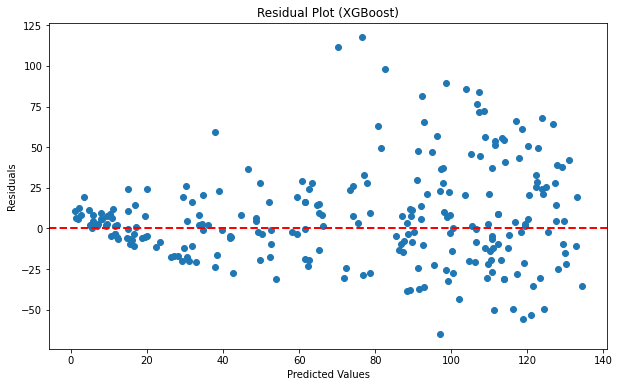

In [45]:
# Step 4: Calculate residuals (difference between actual and predicted values)
residuals = y_test - Y_pred

# Step 5: Plot residuals against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost)')
plt.show()